## Gruppierungen und Aggregationen
Hier sind einige Aufgaben für die Verwendung von groupby mit der Titanic-Datenbank (titanic.csv). Diese Aufgaben sollen helfen, das Verständnis für Gruppierungen und Aggregationen zu verbessern.

### Aufgabe 0
Importiere die benötigten Bibliotheken und erstelle mit der Datei `titanic.csv` ein DataFrame.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('titanic.csv')
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


### Aufgabe 0.5
Verschaffe dir einen Überblick über die Daten, welche Spalten gibt es, welche Datentypen haben diese, etc...

In [32]:
print(f'Anzahl Zeilen und Spalten ist {df.shape}')
df.dtypes

Anzahl Zeilen und Spalten ist (891, 12)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Aufgabe 1: Überlebensrate nach Klasse
Gruppiere die Daten nach der Klasse (Pclass) und berechne die Überlebensrate für jede Klasse.<br>
Hinweis: Verwende die mean-Funktion auf der Spalte Survived, um die Überlebensrate zu berechnen.

In [33]:
gr = df.groupby('Pclass')['Survived'].sum()
print(gr)

durchschnittlich =  df.groupby('Pclass')['Survived'].mean()
print(durchschnittlich)

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### Aufgabe 2: Durchschnittsalter nach Geschlecht und Klasse
Berechne das Durchschnittsalter (Age) der Passagiere, gruppiert nach Geschlecht (Sex) und Klasse (Pclass).<br>
Untersuche, ob es signifikante Unterschiede im Durchschnittsalter zwischen den Klassen und Geschlechtern gibt.

In [34]:
mean_alter = df.groupby(['Sex','Pclass'])['Age'].mean().round(2)
print(mean_alter)
#mean_alter.to_frame

Sex     Pclass
female  1         34.61
        2         28.72
        3         21.75
male    1         41.28
        2         30.74
        3         26.51
Name: Age, dtype: float64


### Aufgabe 3: Analyse der Ticketpreise nach Überlebensstatus
Gruppiere die Daten nach dem Überlebensstatus (Survived) und berechne den durchschnittlichen Ticketpreis (Fare) für Überlebende und Nicht-Überlebende.<br>
Berechne zusätzlich den Median und die Standardabweichung des Ticketpreises für jede Gruppe.<br>
Wieviele Passagiere haben keine Gebühr (also 0) bezahlt ?

In [35]:
mean_ticket_price = df.groupby(['Survived'])['Fare'].mean()
median_ticket_price = df.groupby(['Survived'])['Fare'].median()
abw_ticket_price = df.groupby(['Survived'])['Fare'].std()
keine_gebuer = df[df['Fare'] == 0].shape[0] # Der DataFrame wird mit der Bedinung Fare = 0  gefiltert, shape gibt die Dimensionen zurück
print(f'Durchschnittliche Price ist {mean_ticket_price}\n\n Median ist {median_ticket_price}\n\nStandartabweichung ist{abw_ticket_price}\n\n')
print(f'Anzahl der Passagieren, die keine Gebür bezahlt haben:\n{keine_gebuer}')


Durchschnittliche Price ist Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

 Median ist Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

Standartabweichung istSurvived
0    31.388207
1    66.596998
Name: Fare, dtype: float64


Anzahl der Passagieren, die keine Gebür bezahlt haben:
15


In [36]:
ticketpreice = df.groupby('Survived')['Fare'].agg(['mean', 'median', 'std']).round(2)
ticketpreice

,mean,median,std
Survived,,,
0,22.12,10.5,31.39
1,48.40,26.0,66.60


In [37]:
print(df['Fare'].value_counts().loc[0])

15


### Aufgabe 4: Geschlechterverteilung pro Klasse
Bestimme die Anzahl der männlichen und weiblichen Passagiere in jeder Klasse (Pclass).<br>
Überlege, wie man die Daten visualisieren könnte, um die Geschlechterverteilung je Klasse zu zeigen.

In [38]:
mann = df[df['Sex'] == 'male'].groupby('Pclass').size()
frau = df[df['Sex'] == 'female'].groupby('Pclass').size()
print(f'Anzahl der Männer bei {mann}\n\nAnzahl der Frauen bei {frau}')
mann = df[df['Sex'] == 'male'].groupby('Pclass').size()

# Passagiere der 3. Klasse und Gruppierung nach Geschlecht
anzahl_maenner_frauen = df[df['Pclass'] == 3]['Sex'].value_counts()
print("Anzahl der Männer und Frauen in der 3. Klasse:")
print(anzahl_maenner_frauen)


# Passagiere der 3. Klasse, die überlebt haben
ueberlebt_maenner_frauen = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]['Sex'].value_counts()
print("Anzahl der überlebenden Männer und Frauen in der 3. Klasse:")
print(ueberlebt_maenner_frauen)

# Passagiere der 2. Klasse, die überlebt haben
ueberlebt_maenner_frauen = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]['Sex'].value_counts()
print("Anzahl der überlebenden Männer und Frauen in der 2. Klasse:")
print(ueberlebt_maenner_frauen)

# Passagiere der 2. Klasse, die überlebt haben
ueberlebt_maenner_frauen = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]['Sex'].value_counts()
print("Anzahl der überlebenden Männer und Frauen in der 1. Klasse:")
print(ueberlebt_maenner_frauen)


Anzahl der Männer bei Pclass
1    122
2    108
3    347
dtype: int64

Anzahl der Frauen bei Pclass
1     94
2     76
3    144
dtype: int64
Anzahl der Männer und Frauen in der 3. Klasse:
Sex
male      347
female    144
Name: count, dtype: int64
Anzahl der überlebenden Männer und Frauen in der 3. Klasse:
Sex
female    72
male      47
Name: count, dtype: int64
Anzahl der überlebenden Männer und Frauen in der 2. Klasse:
Sex
female    70
male      17
Name: count, dtype: int64
Anzahl der überlebenden Männer und Frauen in der 1. Klasse:
Sex
female    91
male      45
Name: count, dtype: int64


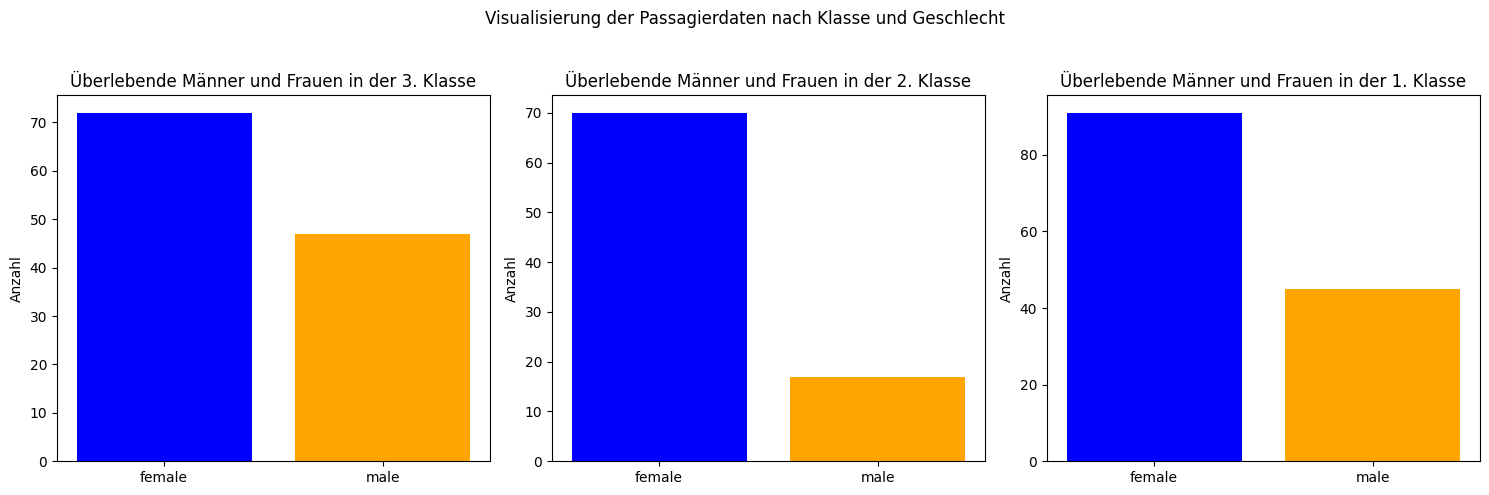

In [65]:
import matplotlib.pyplot as plt

# Anzahl der überlebenden Männer und Frauen in der 3. Klasse
ueberlebt_maenner_frauen_3 = df[(df['Pclass'] == 3) & (df['Survived'] == 1)]['Sex'].value_counts()

# Anzahl der überlebenden Männer und Frauen in der 2. Klasse
ueberlebt_maenner_frauen_2 = df[(df['Pclass'] == 2) & (df['Survived'] == 1)]['Sex'].value_counts()

# Anzahl der überlebenden Männer und Frauen in der 1. Klasse
ueberlebt_maenner_frauen_1 = df[(df['Pclass'] == 1) & (df['Survived'] == 1)]['Sex'].value_counts()

# Erstellen des Subplots (1 Zeile, 3 Spalten)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Anpassen der Größe für bessere Lesbarkeit
fig.suptitle('Visualisierung der Passagierdaten nach Klasse und Geschlecht')

# Plot für die Anzahl der Männer und Frauen in der 3. Klasse
axes[0].bar(ueberlebt_maenner_frauen_3.index, ueberlebt_maenner_frauen_3.values, color=['blue', 'orange'])
axes[0].set_title('Überlebende Männer und Frauen in der 3. Klasse')
axes[0].set_ylabel('Anzahl')

# Plot für die Anzahl der überlebenden Männer und Frauen in der 2. Klasse
axes[1].bar(ueberlebt_maenner_frauen_2.index, ueberlebt_maenner_frauen_2.values, color=['blue', 'orange'])
axes[1].set_title('Überlebende Männer und Frauen in der 2. Klasse')
axes[1].set_ylabel('Anzahl')

# Plot für die Anzahl der überlebenden Männer und Frauen in der 1. Klasse
axes[2].bar(ueberlebt_maenner_frauen_1.index, ueberlebt_maenner_frauen_1.values, color=['blue', 'orange'])
axes[2].set_title('Überlebende Männer und Frauen in der 1. Klasse')
axes[2].set_ylabel('Anzahl')

# Layout anpassen und anzeigen
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Titel schaffen
plt.show()


ValueError: The 'color' keyword argument must have one color per dataset, but 1 datasets and 2 colors were provided

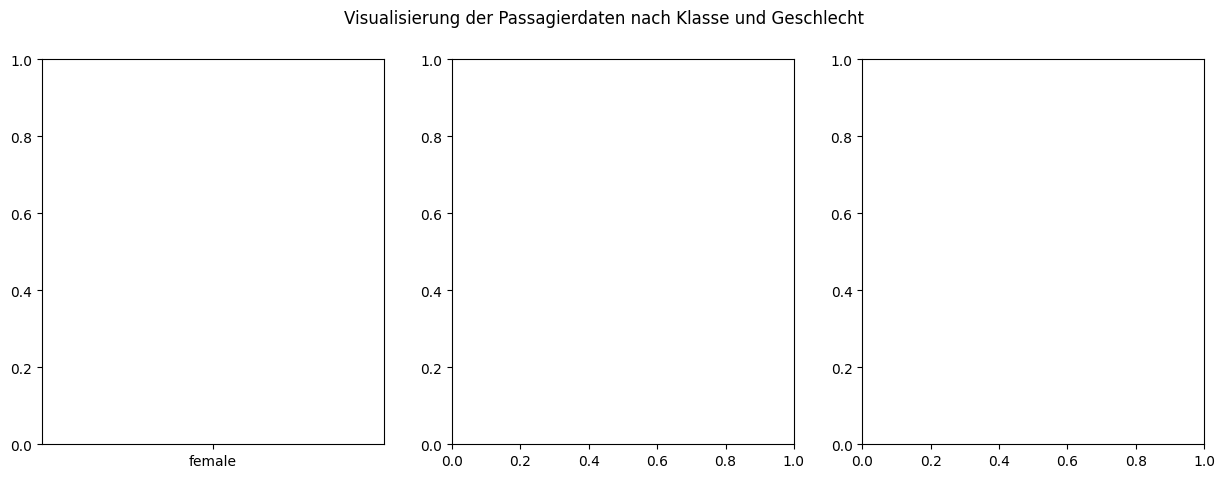

In [66]:
# Erstellen des Subplots (1 Zeile, 3 Spalten)
fig, axes = plt.subplots(1, 3, figsize=(15, 5))  # Anpassen der Größe für bessere Lesbarkeit
fig.suptitle('Visualisierung der Passagierdaten nach Klasse und Geschlecht')

# Plot für die Anzahl der Männer und Frauen in der 3. Klasse
axes[0].hist(ueberlebt_maenner_frauen_3.index, ueberlebt_maenner_frauen_3.values, color=['blue', 'orange'])
axes[0].set_title('Überlebende Männer und Frauen in der 3. Klasse')
axes[0].set_ylabel('Anzahl')

# Plot für die Anzahl der überlebenden Männer und Frauen in der 2. Klasse
axes[1].hist(ueberlebt_maenner_frauen_2.index, ueberlebt_maenner_frauen_2.values, color=['blue', 'orange'])
axes[1].set_title('Überlebende Männer und Frauen in der 2. Klasse')
axes[1].set_ylabel('Anzahl')

# Plot für die Anzahl der überlebenden Männer und Frauen in der 1. Klasse
axes[2].hist(ueberlebt_maenner_frauen_1.index, ueberlebt_maenner_frauen_1.values, color=['blue', 'orange'])
axes[2].set_title('Überlebende Männer und Frauen in der 1. Klasse')
axes[2].set_ylabel('Anzahl')

# Layout anpassen und anzeigen
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Platz für den Titel schaffen
plt.show()

### Aufgabe 5: Altersspannenanalyse
Erstelle eine neue Spalte Altersgruppe, die Passagiere nach Alter gruppiert, z.B. 0–12 (Kinder), 13–19 (Teenager), 20–35 (junge Erwachsene), 36–60 (Erwachsene), 60+ (Senioren). <br>
Gruppiere die Daten nach Altersgruppe und berechne die Überlebensrate für jede Altersgruppe.

In [43]:
bins = [0, 12, 19, 35, 60, float('inf')]
labels = ['Kinder', 'Teenager', 'Junge Erwachsene', 'Erwachsene', 'Senioren']
df['Altersgruppe'] = pd.cut(df['Age'], bins=bins, labels=labels)

ueberlebenstate = df.groupby(['Altersgruppe'])['Survived'].mean()
print(ueberlebenstate )



Altersgruppe
Kinder              0.579710
Teenager            0.410526
Junge Erwachsene    0.384384
Erwachsene          0.400000
Senioren            0.227273
Name: Survived, dtype: float64


C:\Users\NataliaArchipenko\AppData\Local\Temp\ipykernel_9652\3864611962.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ueberlebenstate = df.groupby(['Altersgruppe'])['Survived'].mean()


In [44]:
ueberlebensrate_altersgruppe = df.groupby('Altersgruppe', observed = False)['Survived'].agg(Ueberlebensrate = 'mean', Anzahl ='count')
ueberlebensrate_altersgruppe

,Ueberlebensrate,Anzahl
Altersgruppe,,
Kinder,0.579710,69
Teenager,0.410526,95
Junge Erwachsene,0.384384,333
Erwachsene,0.400000,195
Senioren,0.227273,22


In [ ]:
def alter_in_gruppe(age):
    if age <13:
        return 'Kind'
    elif age < 20:
        return 'Teenager'
    elif age < 36:
        return 'junger Erwachsener'
    elif age < 61:
        return 'Erwachsener'
    elif age >=61:
        return 'Senior'
    else: 
        return'Unbekannt'
    
df['Altersgruppe']= df['Age'].apply(alter_in_gruppe)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Altersgruppe
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,junger Erwachsener
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Erwachsener
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,junger Erwachsener


### Aufgabe 6: Kabinenanalyse nach Deck
Extrahiere den ersten Buchstaben der Cabin-Spalte, um das Deck zu bestimmen.<br>
Gruppiere die Daten nach Deck und berechne die Überlebensrate für jedes Deck.<br>
Hinweis: Nicht alle Passagiere haben eine Kabinenangabe; diese sollten entsprechend behandelt werden.<br>
Berechne anschließend wieviele Passagiere auf dem jeweiligen Deck untergebracht waren.

In [ ]:
df['Deck'] = df['Cabin'].str[0] # Extrahiern vom ersten Buchstabe

deck_analysis = df.groupby('Deck').agg(ueberlebensrate=('Survived', 'mean'), passagiere=('Survived', 'size'))#durchnitt und summe

deck_analysis = deck_analysis.fillna(0)  # statt Nan 0 einsetzen

print(deck_analysis)


      ueberlebensrate  passagiere
Deck                             
A            0.466667          15
B            0.744681          47
C            0.593220          59
D            0.757576          33
E            0.750000          32
F            0.615385          13
G            0.500000           4
T            0.000000           1


In [46]:
df.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [48]:
print(df.Cabin.dtype)

object


In [52]:
df['Deck']=df['Cabin'].dropna().apply(lambda x: x[0])
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Altersgruppe,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Junge Erwachsene,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Erwachsene,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Junge Erwachsene,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Junge Erwachsene,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Junge Erwachsene,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Junge Erwachsene,NaN
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Teenager,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,NaN,NaN
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Junge Erwachsene,C


In [53]:
ueberlebensrate_pro_deck = df.groupby('Deck')['Survived'].mean()
ueberlebensrate_pro_deck.to_frame

<bound method Series.to_frame of Deck
A    0.466667
B    0.744681
C    0.593220
D    0.757576
E    0.750000
F    0.615385
G    0.500000
T    0.000000
Name: Survived, dtype: float64>

In [54]:
passagiere_pro_deck = df.groupby('Deck')['Survived'].size()
print(passagiere_pro_deck)

Deck
A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Survived, dtype: int64
